In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from glob import glob
import sys, os

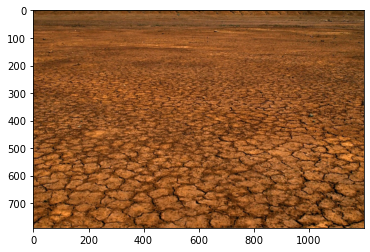

In [4]:
plt.imshow(image.load_img('Soil/bad fertility/2000.jpg'))
plt.show()

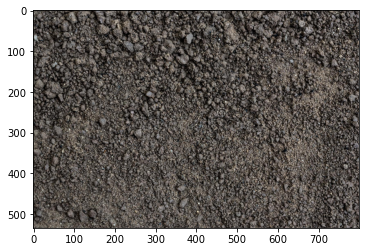

In [5]:
plt.imshow(image.load_img('Soil/good fertility/1.jpg'))
plt.show()

In [111]:
train_path="Soil"
test_path="Test1"

In [112]:
IMAGE_SIZE=[200,200]

In [113]:
#useful for getting number of files
image_files=glob(train_path+'/*/*.jpg')
valid_files=glob(test_path+'/*/*.jpg')

In [114]:
len(image_files), len(valid_files)

(20, 22)

In [115]:
#useful to get number of classes
folders=glob(train_path+'/*')
folders

['Soil\\bad fertility', 'Soil\\good fertility']

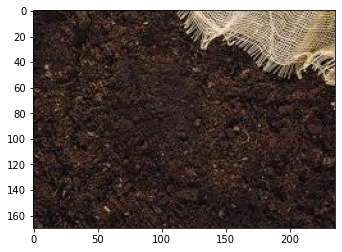

In [116]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [117]:
ptm=PretrainedModel(
    input_shape=IMAGE_SIZE+[3],
    weights='imagenet',
    include_top=False)

In [118]:
ptm.trainable=False

In [119]:
K=len(folders)

x=Flatten()(ptm.output)
x=Dense(K, activation='softmax')(x)

In [120]:
model=Model(inputs=ptm.input, outputs=x)

In [121]:
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)     

In [122]:
gen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

In [123]:
batch_size=128

train_generator=gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
)
valid_generator=gen.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
)

Found 20 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [128]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [129]:
r=model.fit_generator(
    train_generator,
    validation_data=valid_generator,
    epochs=50,
    steps_per_epoch=int(np.ceil(len(image_files)/batch_size)),
    validation_steps=int(np.ceil(len(valid_files)/batch_size)),
)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.7905 - accuracy: 0.9000 - val_loss: 1.1075 - val_accuracy: 0.7727
Epoch 2/50
1/1 [==============================] - 1s 760ms/step - loss: 0.4721 - accuracy: 0.9500 - val_loss: 0.6437 - val_accuracy: 0.8636
Epoch 3/50
1/1 [==============================] - 1s 740ms/step - loss: 0.0931 - accuracy: 0.9500 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 1s 783ms/step - loss: 0.2884 - accuracy: 0.9000 - val_loss: 1.7570 - val_accuracy: 0.7727
Epoch 5/50
1/1 [==============================] - 1s 757ms/step - loss: 8.9406e-07 - accuracy: 1.0000 - val_loss: 2.9722 - val_accuracy: 0.8182
Epoch 6/50
1/1 [==============================] - 1s 747ms/step - loss: 6.4778e-05 - accuracy: 1.0000 - val_loss: 3.0049 - val_accuracy: 0.7727
Epoch 7/50
1/1 [==============================] - 1s 745ms/step - loss: 2.5838 - accuracy: 0.8000 - val_loss: 4.1528 - val_accuracy: 0.8182
Epoch 8/50
1/1 

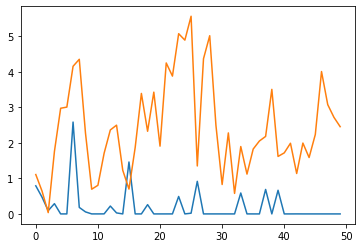

In [130]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

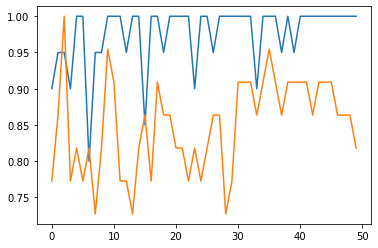

In [131]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.show()

In [132]:
pred=model.predict_generator(valid_generator, steps=int(np.ceil(len(valid_files)/batch_size)))

Instructions for updating:
Please use Model.predict, which supports generators.


In [133]:
predd=np.round(pred)
predd

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [134]:
len(predd)

22

In [136]:
my_test_path="Test1"
my_test_generator=gen.flow_from_directory(
    my_test_path,
    target_size=IMAGE_SIZE,
    batch_size=1,
)

Found 22 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


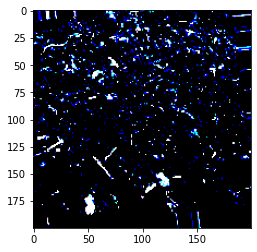

In [143]:
x,y = my_test_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [144]:
pred=model.predict_generator(my_test_generator, steps=1)

In [145]:
labels = (train_generator.class_indices)
print(labels)

predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

{'bad fertility': 0, 'good fertility': 1}


array([0], dtype=int64)

In [146]:
labels = dict((v,k) for k,v in labels.items())
print(labels)
predictions = [labels[k] for k in predicted_class_indices]
predictions

{0: 'bad fertility', 1: 'good fertility'}


['bad fertility']